# Статистика, DS-поток
## Задание SP.6

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  70 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  200 баллов

**Важность задач:**

* *высокая:* задачи 1, 2, 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

Почему все задачи высокой степени? Просто остальные убрали :)

In [ ]:
# Bot check

# HW_ID: ds_sp6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 

sns.set(font_scale=1.2, palette='Set2')

______________
### Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine (файл `wine.data`) и загрузите их с помощью библиотеки pandas.

In [10]:
wine = fetch_ucirepo(id=109)['data']['features']

In [11]:
wine

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

$$
l_X(a,\Sigma)=-\frac{d}{2}\ln 2\pi-\frac{1}{2}\ln|\Sigma|-\frac{1}{2}\sum_{i=1}^n(X_i-a)^T\Sigma^{-1}(X-a)
$$

$$
\frac{\partial l_X}{\partial a}=\sum_{i=1}^n (X_i-a)\Sigma^{-1}=\left(\sum_{i=1}^n X_i-na\right)\Sigma^{-1}=0\Rightarrow a=\frac{1}{n}\sum_{i=1}^n X_i=\overline{X}
$$

$$
\frac{\partial l_X}{\partial \Sigma}=-\frac{1}{2}\Sigma^{-1}+\frac{1}{2}\sum_{i=1}^n (X_i-a)(X_i-a)^T\Sigma^{-2}=0\Rightarrow \Sigma=\frac{1}{n}\sum_{i=1}^n (X_i-a)(X_i-a)^T
$$

**Ответ:**

$$
\hat{a}=\overline{X}\qquad \hat{\Sigma}=\frac{1}{n}\sum_{i=1}^n (X_i-\hat{a})(X_i-\hat{a})^T
$$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue" для всех сортов вина вместе.
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

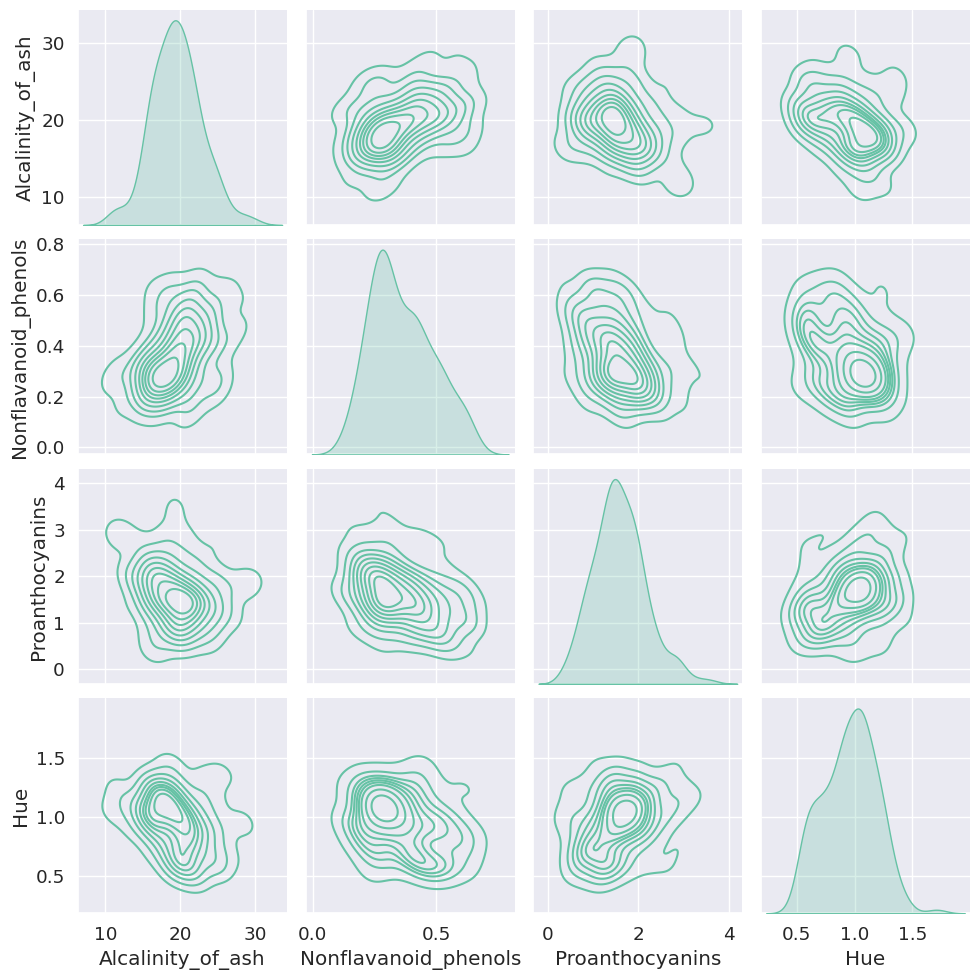

In [18]:
wine_sample = wine[['Alcalinity_of_ash', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Hue']]
sns.pairplot(wine_sample, kind='kde')

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $a$ и матрицы ковариаций $\Sigma$ по выборке. Использование циклов наказуемо.

In [14]:
def mle_for_mean(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    '''
    
    return 1 / sample.shape[0] * sample.sum(axis=0)

In [24]:
def mle_for_covariance_matrix(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    '''
    
    y = sample - mle_for_mean(sample)
    return 1 / sample.shape[0] * (y.T @ y)

In [25]:
a = mle_for_mean(wine_sample)
sigma = mle_for_covariance_matrix(wine_sample)

Визуализируйте полученный результат. Для каждой пары признаков постройте информативный график, на котором будут:

1. Точки выборки.

2. Плотность нормального распределения с оцененными параметрами, которую изобразите в виде линий уровня.

*Указание.* Используйте функции `plt.pcolormesh` и `plt.clabel`

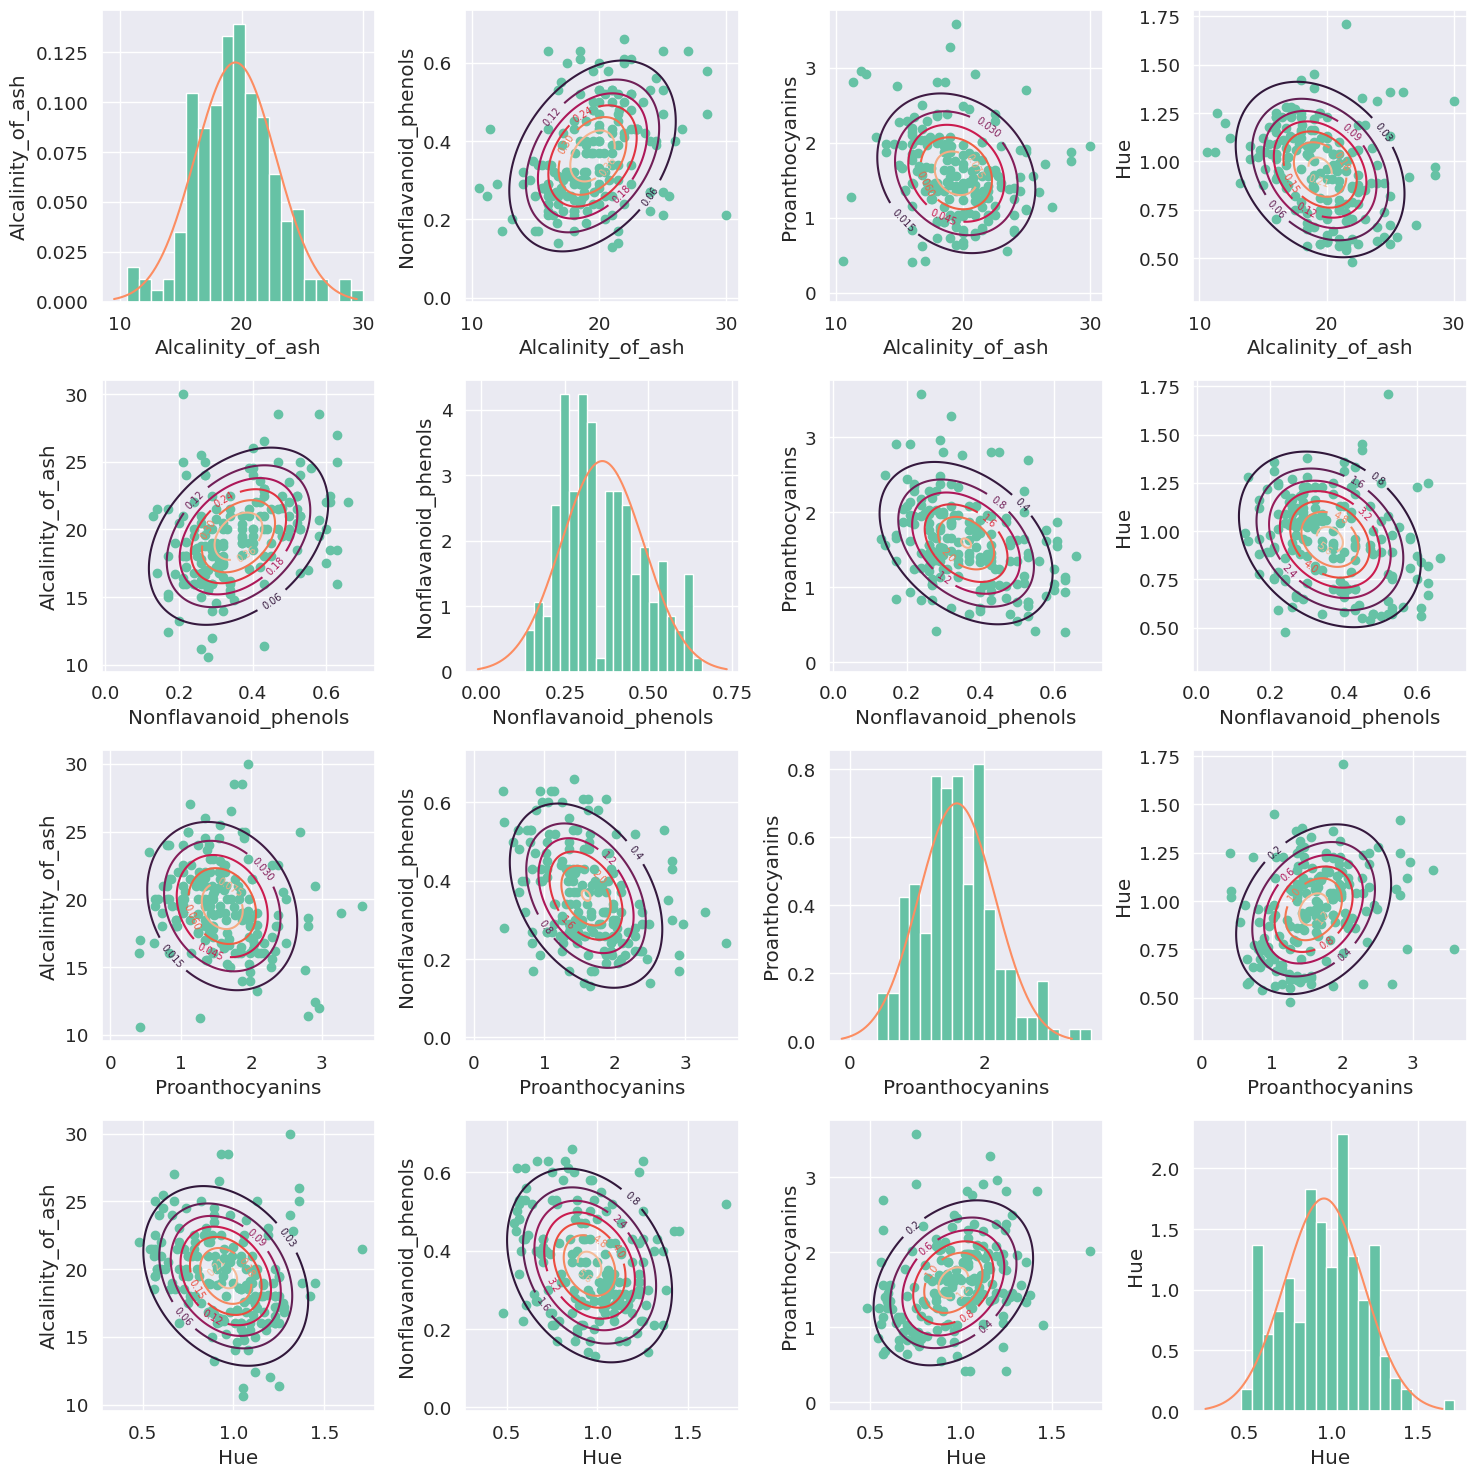

In [79]:
features = ['Alcalinity_of_ash', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Hue']

def generate_arg_range(a, sigma):
    return np.linspace(a - 3 * np.sqrt(sigma), a + 3 * np.sqrt(sigma), 1000)

fig, ax = plt.subplots(4, 4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        ax[i, j].set_xlabel(features[i])
        ax[i, j].set_ylabel(features[j])
        if i == j:
            ax[i, j].hist(wine[features[i]], bins=20, density=True, label='true')
            x = generate_arg_range(a.iloc[i], sigma.iloc[i, i])
            ax[i, j].plot(x, sps.norm.pdf(x, loc=a.iloc[i], scale=np.sqrt(sigma.iloc[i, i])))
        else:
            ax[i, j].scatter(wine[features[i]], wine[features[j]])
            x = generate_arg_range(a.iloc[i], sigma.iloc[i, i])
            y = generate_arg_range(a.iloc[j], sigma.iloc[j, j])
            x, y = np.meshgrid(x, y)
            v = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
            z = sps.multivariate_normal.pdf(v, mean=a.iloc[[i, j]], cov=sigma.iloc[[i, j], [i, j]]).reshape(1000, 1000)
            cs = ax[i, j].contour(x, y, z)
            ax[i, j].clabel(cs, fontsize=7)

plt.tight_layout()
plt.show()

**Вывод:** оценка максимального правдоподобия позволила достаточно точно оценить распределение величин, в т.ч. совместное.

__________________
### Задача 2.

**1.** Загрузите <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/">данные</a>, которые содержат набор медицинских исследований, проведенных в рамках исследования о наличии у пациента сахарного диабета. Пациенты относятся к индейскому племени Пима.

In [80]:
df = pd.read_csv('diabetes.csv')

Выведите описательные статистики (метод `describe`) для всех признаков.  Округлите до второго знака после запятой.

In [81]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** очень сильные выбросы имеются для признаков Insulin и Outcome

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует таргеты, а ось `y` — значениям параметра. Используйте функцию `seaborn.boxplot`.

In [86]:
features = df.columns[:-1]
target = 'Outcome'

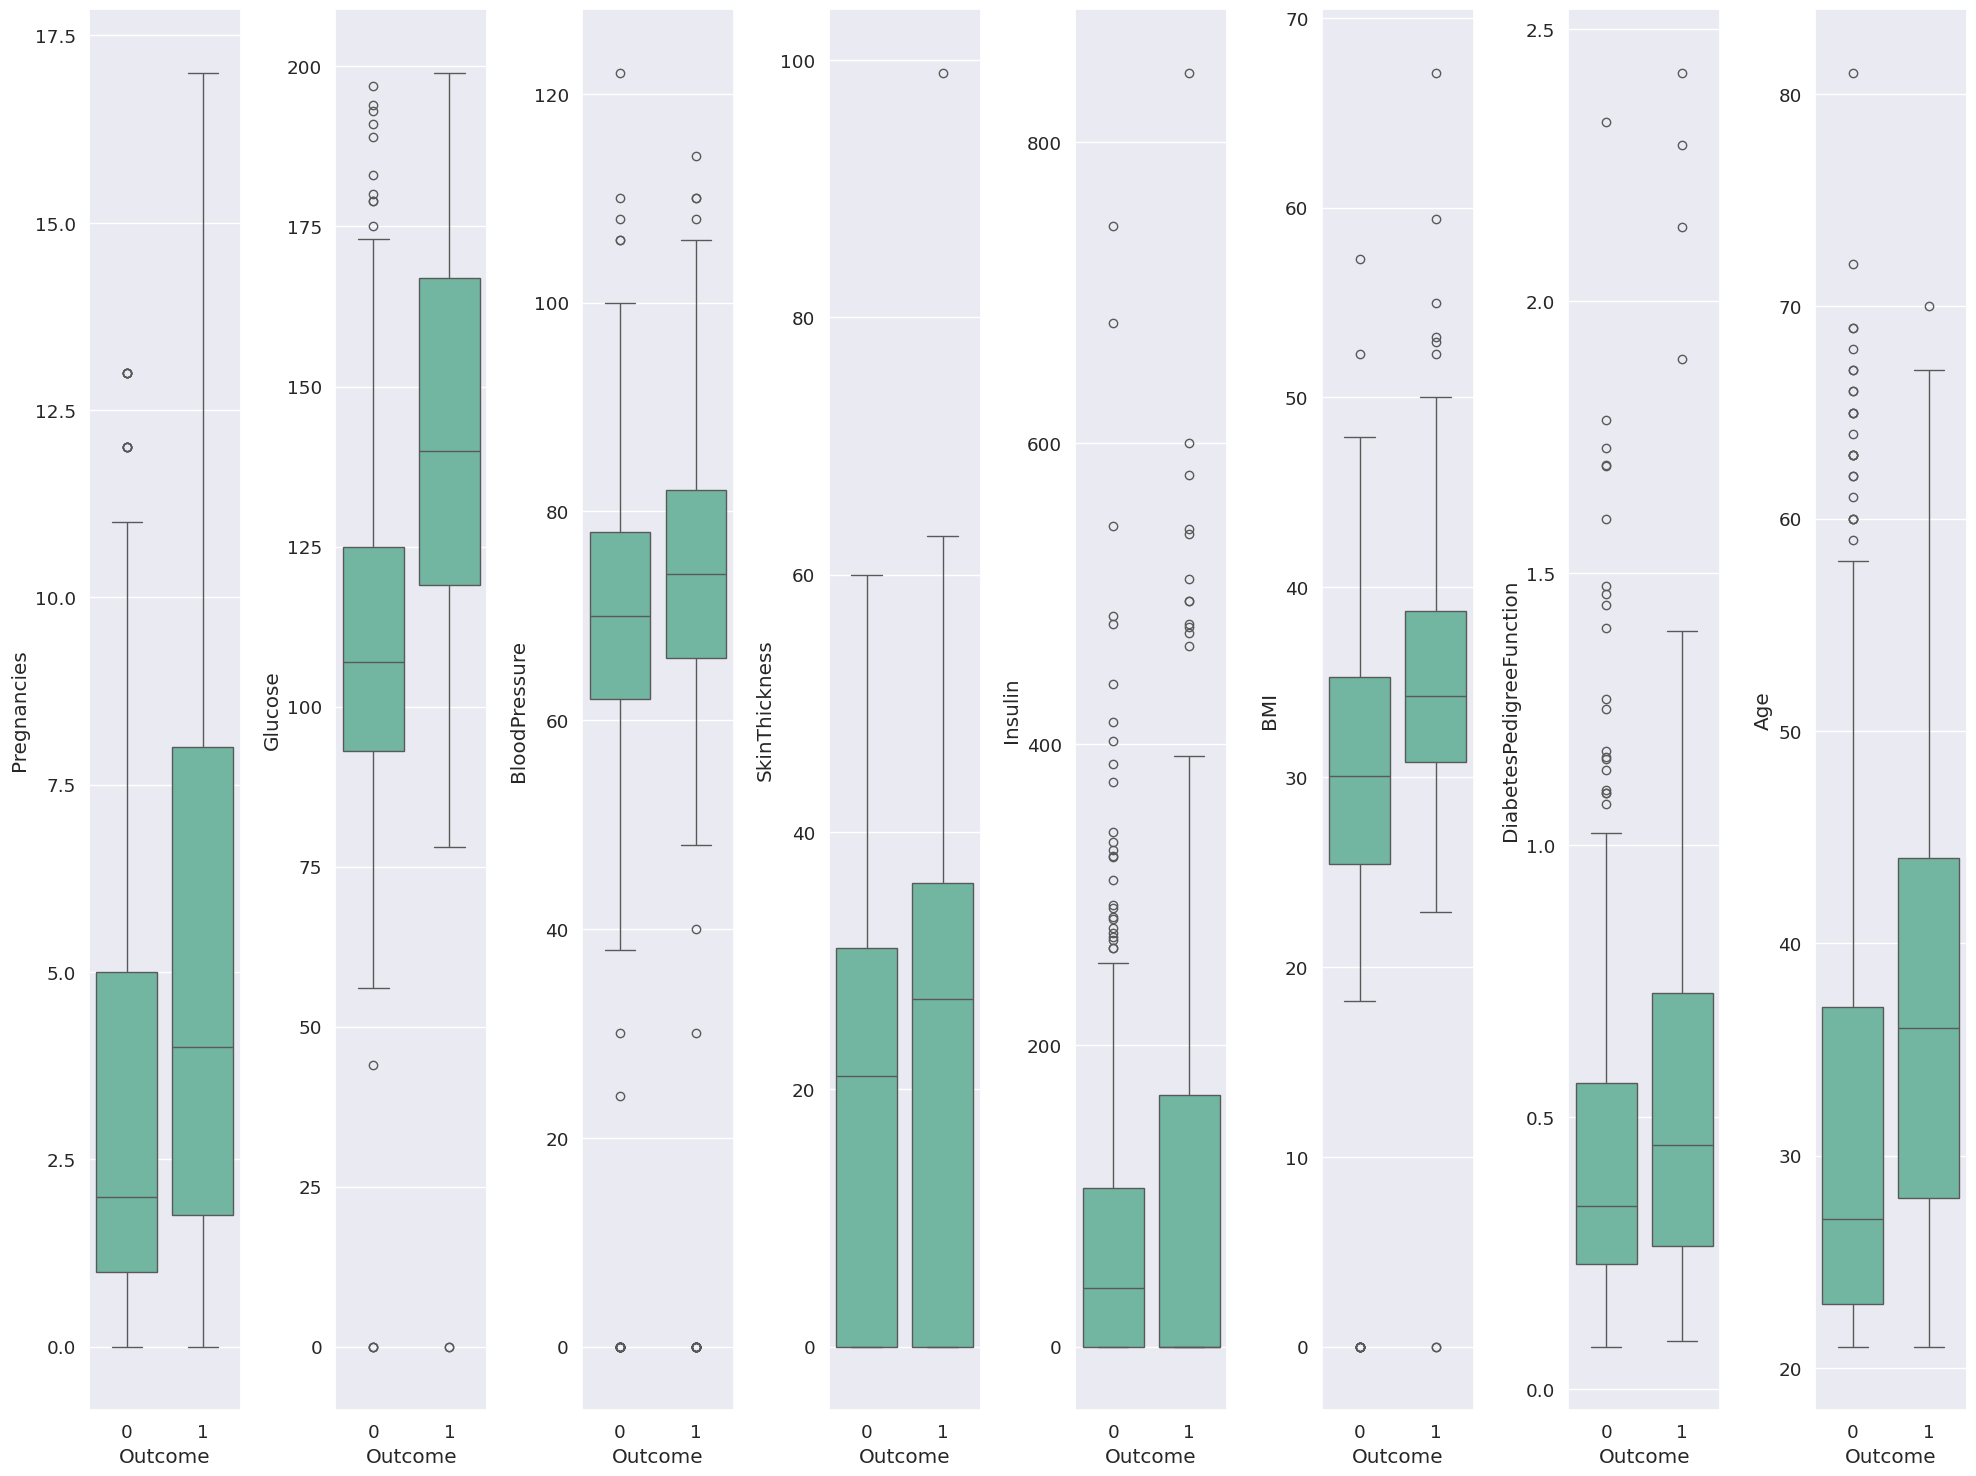

In [91]:
fig, ax = plt.subplots(1, 8, figsize=(20, 15))
for i, feature in enumerate(features):
    sns.boxplot(data=df, x='Outcome', y=feature, ax=ax[i])

plt.tight_layout()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** Ящик соответствует значениям от квантиля $0.25$ до квантиля $0.75$, причём линия внутри отражает медиану. Усы показывают диапазон от $X_{0.25}-1.5(X_{0.75}-X_{0.25})$ до $X_{0.75}+1.5(X_{0.25}-X_{0.75})$. Всё остальное считается выбросами и показывается точками. Почти во всех данных (кроме Pregnancies и SkinThickness) имеется некоторое количество выбросов, но особенно много их для Insulin и DiabetesPedigreeFunction (в последнем случае - только для Outcome=0). 

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;
- медиану средних Уолша.

Для реализации медианы средних Уолша без циклов обратите внимание на следующие **подсказки**:
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?
2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`.

In [143]:
out_feature = 'Insulin'

mean = np.mean(df['Insulin'])
med = np.median(df['Insulin'])

def walsh(x):
    mean_table = (x + x.T) / 2
    idx = np.triu_indices(x.shape[0], 1)
    return np.median(mean_table[idx])

x = df['Insulin'].values.reshape(-1, 1)
walsh_med = walsh(x)

print('Mean =', mean)
print('Median =', med)
print('Walsh median =', walsh_med)

Mean = 79.79947916666667
Median = 30.5
Walsh median = 62.5


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** среднее крайне чувствительно к выбросам (асимптотическая толерантность 0), в то время как медиана имеет асимптотическую толерантность $0.5$. У медианы средних Уолша аисмптотическая толерантность находится между этими значениями, будучи равной  $1-\frac{\sqrt{2}}{2}\approx 0.29$

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.

**Вывод:** робастные статистики позволяют работать с данными, имеющими выбросы (а в реальном мире почти все данные такие, с долей выбросов в среднем 10%). Визуальный анализ, в частности, с помощью ящиков с усами, позволяет определить наличие и количество выбросов, чтобы мы могли принять решение, какую статистику использовать. Что касается независимых одинаково распределённых случайных величин - в реальном мире такие редкость.

______________
### Задача 3.

> *Указание.* При решении этой задачи посмотрите решения задач SP.2.3-4 и SP.3.1-2. Если потребуется, можно копировать код из своих решений этих задач или решений, которые выложены на вики.

Предлагается изучить свойства оценок параметра сдвига для распределения Коши, обладающего плотностью $$p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}.$$

> Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.
>
> В анализе данных такое распределение применяться для получения робастных процедур.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

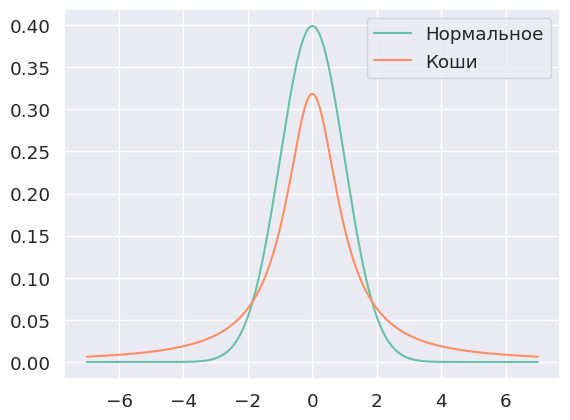

In [101]:
x = np.linspace(-7, 7, 1000)
plt.plot(x, sps.norm.pdf(x, loc=0, scale=1), label='Нормальное')
plt.plot(x, sps.cauchy.pdf(x, loc=0, scale=1), label='Коши')
plt.legend()
plt.show()

**Вывод:** у распределения Коши более тяжёлые хвосты, из-за чего у него нет математического ожидания.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

По теореме с лекции:

$$
\sigma_\alpha^2=\frac{2}{(1-2\alpha)^2}\left[\int_0^{U_{1-\alpha}}x^2 p(x)dx+\alpha U_{1-\alpha}^2\right]=\frac{2}{(1-2\alpha)^2}\left[\frac{U_{1-\alpha}-\mathrm{arctg}\,U_{1-\alpha}}{\pi}+\alpha U_{1-\alpha}^2\right]
$$

$$
U_{1-\alpha}=F^{-1}(1-\alpha)=\mathrm{tg}\,\pi\left((1-\alpha)-\frac{1}{2}\right)=\mathrm{tg}\,\pi\left(\frac{1}{2}-\alpha\right)
$$

In [108]:
def trim_mean_var(alpha):
    u = np.tan(np.pi * (0.5 - alpha))
    return 2 / (1 - 2 * alpha)**2 * ((u - np.atan(u)) / np.pi + alpha * u**2)

(0.0, 5.0)

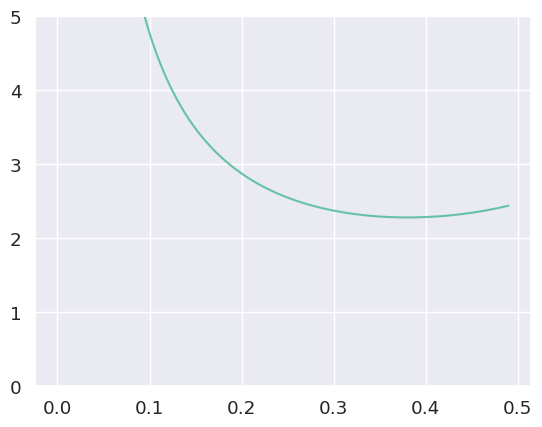

In [119]:
alpha = np.linspace(0, 0.49, 999)
plt.plot(alpha, trim_mean_var(alpha))
plt.ylim((0, 5))

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

In [121]:
a_min = alpha[np.argmin(trim_mean_var(alpha))]
print('alpha = %.2f' % a_min)
print('sigma = %.2f' % trim_mean_var(a_min))

alpha = 0.38
sigma = 2.28


**Ответ и вывод:** Минимум асимптотической дисперсии равен $\sim 2.28$ при $\alpha\approx 0.38$. Таким образом мы можем, используя усечённое среднее, найти сдвиг распределения Коши с приемлемой точностью.

**3.** 
Сгенерируйте выборку $X_1, ... X_{200}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев:

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ (см. замечание ниже);
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя
    * выборочную медиану;
    * усеченное среднее порядка $\alpha$, на котором достигается минимум $\sigma^2_{\alpha}$;
    * выборочную медиану;
    * медиану средних Уолша;
    * любую асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

*Замечания.*
1. Первый случай призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.
2. Производите отладку кода на малых числах.
3. Если не успеваете до дедлайна, можете сократить количество вариантов, потеряв при этом некоторую часть баллов.


**Решение:**

In [126]:
n = 200
X = sps.cauchy.rvs(size=n)
alpha = 0.95

In [128]:
left_normal = np.mean(X) + sps.norm.ppf((1 - alpha) / 2) * 1 / np.sqrt(n)
right_normal = np.mean(X) + sps.norm.ppf((1 + alpha) / 2) * 1 / np.sqrt(n)

(np.float64(0.20261323658861644), np.float64(0.479794001458552))

In [135]:
import math
k = math.ceil(0.38 * n)
X_trim = np.partition(np.partition(X, n - k)[:n-k+1], k)[k:]
left_trim = np.mean(X_trim) + sps.norm.ppf((1 - alpha) / 2) * np.sqrt(2.28) / np.sqrt(n)
right_trim = np.mean(X_trim) + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(2.28) / np.sqrt(n)
left_trim, right_trim

(np.float64(-0.2389874580039078), np.float64(0.17954631867803705))

In [141]:
def var_med():
    X = sps.cauchy.rvs(size=(1000, 200))
    return 200 / 199 * np.var(np.median(X, axis=-1))

left_med = np.median(X) + sps.norm.ppf((1 - alpha) / 2) * np.sqrt(var_med()) / np.sqrt(n)
right_med = np.median(X) + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(var_med()) / np.sqrt(n)

(np.float64(-0.053132858796895784), np.float64(-0.022416508690956613))

In [144]:
def var_walsh():
    X = sps.cauchy.rvs(size=(200, 1000))
    walsh_meds = []
    for i in range(1000):
        walsh_meds.append(walsh(X[:, [i]]))
    return np.var(walsh_meds)

left_walsh = walsh(X.reshape(-1, 1)) + sps.norm.ppf((1 - alpha) / 2) * np.sqrt(var_walsh()) / np.sqrt(n)
right_walsh = walsh(X.reshape(-1, 1)) + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(var_walsh()) / np.sqrt(n)

(np.float64(-0.08158293985540988), np.float64(-0.04528354957645597))

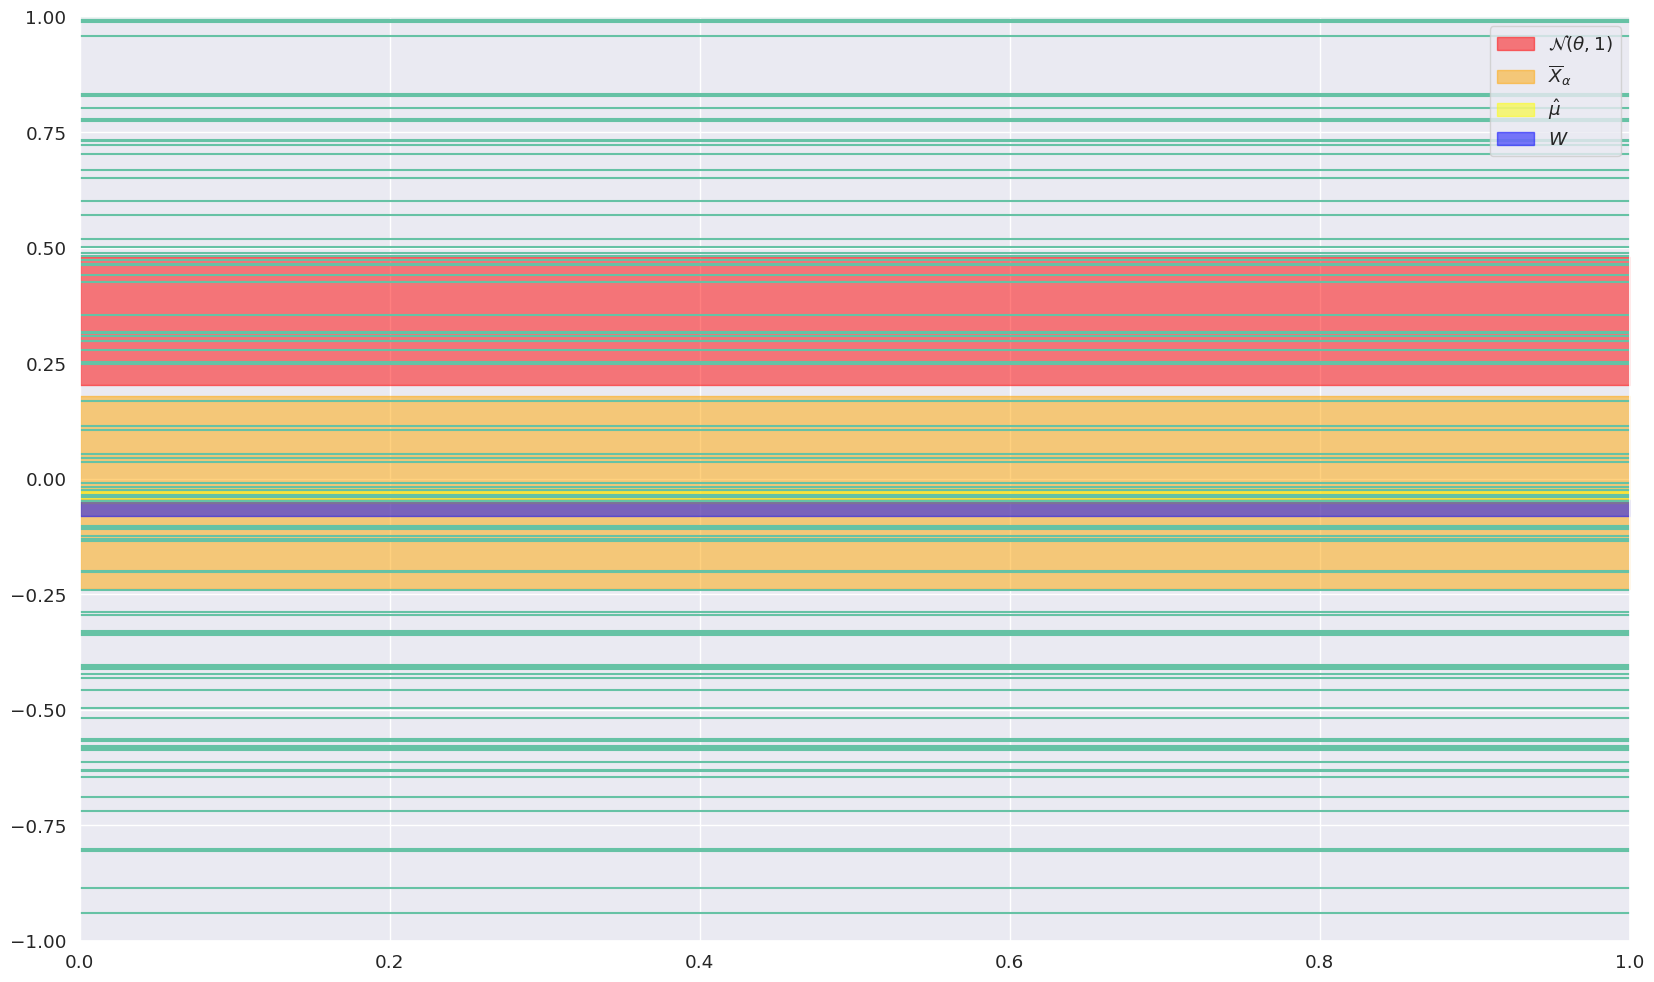

In [156]:
plt.figure(figsize=(20, 12))

for x in X:
    plt.hlines(x, 0, 1)

plt.fill_between([0, 1], [left_normal, left_normal], [right_normal, right_normal], alpha=0.5, color='red', label='$\mathcal{N}(\\theta, 1)$')
plt.fill_between([0, 1], [left_trim, left_trim], [right_trim, right_trim], alpha=0.5, color='orange', label='$\overline{X}_\\alpha$')
plt.fill_between([0, 1], [left_med, left_med], [right_med, right_med], alpha=0.5, color='yellow', label='$\hat{\mu}$')
plt.fill_between([0, 1], [left_walsh, left_walsh], [right_walsh, right_walsh], alpha=0.5, color='blue', label='$W$')

plt.xlim((0, 1))
plt.ylim((-1, 1))
plt.legend()
plt.show()

**Вывод:** В данном случае лучше всех себя показало усечённое среднее, т.к. истинное значение попало в доверительный интервал. Для нормального распределения (неправильной модели) заметно, что доверительный интервал сильно смещён относительно истинного значения.

**4.** Сравните все исследуемые интервалы по величине доли покрытия истинного значения $\theta$, а также по средней длине интервала. Сравнение проведите для всех размеров выборки от 1 до 200 включительно. 

*Замечания.*
1. Производите отладку кода на малых числах.
2. Нужно выполнить достаточное количество семплирований выборок, не менее 1000.
3. Если код работает больше часа, разрешается проводить сравнение для размеров выборок по сетке с некоторым шагом, больше 1. При этом сделайте замеры времени выполнения ячеек с помощью `%%time`.
4. Если не успеваете до дедлайна, можете сократить количество перебираемых вариантов, потеряв при этом некоторую часть баллов.

**Решение:**

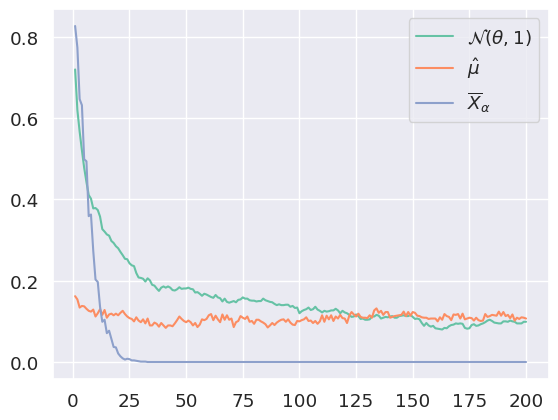

In [199]:
res_mean = []
res_med = []
res_trim = []
res_walsh = []

sample = sps.cauchy.rvs(size=(1000, n))

for n in np.arange(1, 201):
    X = sample[:, :(n + 1)]
    left_normal = np.mean(X, axis=-1) + sps.norm.ppf((1 - alpha) / 2) * 1 / np.sqrt(n)
    right_normal = np.mean(X, axis=-1) + sps.norm.ppf((1 + alpha) / 2) * 1 / np.sqrt(n)
    res_mean.append(np.mean((left_normal <= 0) * (0 <= right_normal)))

    left_med = np.median(X, axis=-1) + sps.norm.ppf((1 - alpha) / 2) * np.sqrt(var_med()) / np.sqrt(n)
    right_med = np.median(X, axis=-1) + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(var_med()) / np.sqrt(n)
    res_med.append(np.mean((left_med <= 0) * (0 <= right_med)))

    k = np.min([math.ceil(0.38 * n), n // 2])
    X_trim = np.partition(np.partition(X, n - k, axis=-1)[:, :(n-k+1)], k, axis=-1)[:, :k+1]
    left_trim = np.mean(X_trim, axis=-1) + sps.norm.ppf((1 - alpha) / 2) * np.sqrt(2.28) / np.sqrt(n)
    right_trim = np.mean(X_trim, axis=-1) + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(2.28) / np.sqrt(n)
    res_trim.append(np.mean((left_trim <= 0) * (0 <= right_trim)))

plt.plot(np.arange(1, 201), res_mean, label='$\mathcal{N}(\\theta,1)$')
plt.plot(np.arange(1, 201), res_med, label='$\hat{\mu}$')
plt.plot(np.arange(1, 201), res_trim, label='$\overline{X}_\\alpha$')

plt.legend()
plt.show()

**Вывод:** наилучшие результаты при больших выборках даёт выборочная медиана, но при любом способе оценка параметра $\theta$ оказывается недостаточно качественной.